# KCF 본선 코드 복구(남아 있는 기록을 토대로 복수 및 개선)

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
label =['public_intoxication', 'turnstile_trespassing', 'assault', 'surrounding_fall', 'escalator_fall', 'spy_camera', 'person', 'child', 'theft']

In [3]:
import yaml


# data.yaml 파일을 읽어 환경 설정 내용 불러오기
with open('./data.yaml') as f:
    conf = yaml.safe_load(f)

number_of_classes = conf['nc']
class_names = conf['names']

print('클래스 개수:', number_of_classes)
print('클래스 이름:', class_names)

클래스 개수: 9
클래스 이름: ['public_intoxication', 'turnstile_trespassing', 'assault', 'surrounding_fall', 'escalator_fall', 'spy_camera', 'person', 'child', 'theft']


In [4]:
import os
import json
import cv2
import sys
import shutil
def data_processing(filename,newfilename):
    print(f"Start {filename}")
    path = f"./subway/{filename}/폭행/"
    if newfilename=="valid":
        os.mkdir(f"./subway/{newfilename}")
        os.mkdir(f"./subway/{newfilename}/images")
        os.mkdir(f"./subway/{newfilename}/labels")
    label =['public_intoxication', 'turnstile_trespassing', 'assault', 'surrounding_fall', 'escalator_fall', 'spy_camera', 'person', 'child', 'theft']

    train_jsonfile_list = os.listdir(path)
    for filename in train_jsonfile_list:
        if filename[:4]=="[라벨]" and filename[-3:]!="zip":
            for jsonfile in os.listdir(path+filename):
                with open(path+filename+"/"+jsonfile,'r') as f:
                    json_data = json.load(f)
                f.close()
                
                # label, x, y, width, height
                for frame in json_data["frames"]:
                    if os.path.exists(f'./subway/{newfilename}/images/{frame["image"]}'):continue
                    #print(f"{path}[원천]{filename[4:]}/{json_data["id"]}/frame_{frame["number"]}.jpg")
                    shutil.copyfile(f'{path}[원천]{filename[4:]}/{json_data["id"]}/{frame["image"]}',
                                    f'./subway/{newfilename}/images/{frame["image"]}')
                    
                    img = cv2.imread(f'./subway/{newfilename}/images/{frame["image"]}')
                    Width = img.shape[1]
                    Height = img.shape[0]
                                        
                    contents=[]
                    for annotation in frame["annotations"]:
                        pos = [*annotation["label"].values()]
                        centerx = (2*pos[0]+pos[2])/2
                        centery = (2*pos[1]+pos[3])/2
                        centerx/=Width
                        centery/=Height
                        pos[2]/=Width
                        pos[3]/=Height
                        contents.append([label.index(annotation["category"]["code"]),centerx,centery,pos[2],pos[3]])
                        
                    with open(f'./subway/{newfilename}/labels/frame_{frame["number"]}.txt','w') as f:
                        for content in contents:
                            print(content)
                            #print(' '.join(content))
                            f.write(' '.join([str(value)for value in content])+"\n")
                            
                    f.close()
                        
                    
                            
                        
#print(set(lt))

#data_processing("Training","train")
#data_processing("Validation","valid")
                        

In [5]:
# # 좌표값이 왼쪽 위와 길이로 저장되어 있어서 비율값으로 수정해야함
# import os
# import cv2

# def data_resize(filename):
#     path = f"./subway/{filename}/labels/"
#     for label in os.listdir(path):
#         image_path = f"./subway/{filename}/images/{label[:-4]}.jpg"
#         img = cv2.imread(image_path)
#         print(label)
        
#         #print(image_path)
#         #print(img.shape[0], img.shape[1]) # y,x
#         with open(path+label,'r') as f:
#             edit=""
#             while 1:
#                 t = f.readline()
#                 if not t:break
#                 t = t.split("\n")[0]
#                 #print(t,"#")
#                 bbox = t.split(' ')
#                 #print(bbox)
#                 centerx=(int(bbox[1])+int(bbox[3]))/2
#                 centery=(int(bbox[2])+int(bbox[4]))/2
#                 #print(bbox[0]+' '+str(centerx/img.shape[1])+' '+str(centery/img.shape[0])+' '+str(int(bbox[3])/img.shape[1])+' '+str(int(bbox[4])/img.shape[0]))
#                 edit+=bbox[0]+' '+str(centerx/img.shape[1])+' '+str(centery/img.shape[0])+' '+str(int(bbox[3])/img.shape[1])+' '+str(int(bbox[4])/img.shape[0])
#                 edit+="\n"
                
                
#         #print(edit)
#         with open(path+label,'w') as f:
#             f.write(edit)
            
#         f.close()
        
#         #return
    


In [6]:
import os
import shutil

def data_move(filename):
    path = f"./subway/{filename}/labels/"
    cnt=0
    for label in os.listdir(path):
        cnt+=1
        if cnt>1500:return
        path = f"./subway/{filename}/"
        move_path = "./subway/train/"
        shutil.move(os.path.join(path+"images/",f"{label[:-4]}.jpg"),os.path.join(move_path+"images/",f"{label[:-4]}_2.jpg"))
        shutil.move(os.path.join(path+"labels/",f"{label}"),os.path.join(move_path+"labels/",f"{label[:-4]}_2.txt"))
        
        
        #return

In [7]:
#data_move("valid")

In [8]:
# data_resize("train")
# data_resize("valid")

public_intoxication : 대주의 만취

turnstile_trespassing : 개찰구 무단 침입

assault : 폭행

surrounding_fall : 주변 낙하?

escalator_fall : 에스컬레이터 낙하

spy_camera : 스파이 카메라(무단 도촬?)

person : 사람

child : 아이

theft : 도둑


* Mask Wearing Dataset에 포함된 <b>데이터 개수</b>를 확인합니다.
    * 학습(training) 데이터의 개수: 104개
    * 평가(validation) 데이터의 개수: 28개
    * 테스트(testing) 데이터의 개수: 15개

In [9]:
import os


train_path = './subway/train/'
valid_path = './subway/valid/'


train_file_list = os.listdir(train_path + 'images/')
valid_file_list = os.listdir(valid_path + 'images/')

print(f'학습 데이터 개수: {len(train_file_list)}개')
print(f'평가 데이터 개수: {len(valid_file_list)}개')

학습 데이터 개수: 4394개
평가 데이터 개수: 345개


#### <b>문제 4. 이미지를 화면에 출력하기</b>

* Matplotlib의 기본적인 출력 해상도를 조절합니다.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80 # Dot Per Inch

* Mask Wearing Dataset의 하나의 이미지를 Google Colab 화면에 출력합니다.

이미지 해상도: (2160, 3840, 3)


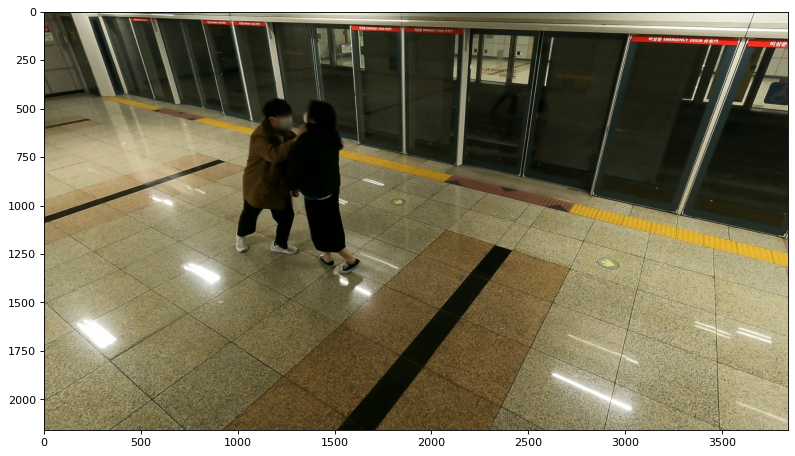

In [11]:
import PIL.Image as Image
import cv2
#지하철_이상행동/
#/content/drive/MyDrive/kcf_23_본선/지하철_이상행동/train/images/frame_3936.jpg
image_name = 'frame_3936.jpg'
path="./subway/train/images/"

img = cv2.imread(path + image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 기본적으로 OpenCV는 BGR 형식을 따르므로, RGB 형식으로 변환
print(f'이미지 해상도: {img.shape}')

plt.imshow(img)
plt.show()

* <b>YOLO 형식(format)</b>에서 각 줄(바운딩 박스) 정보는 다음과 같은 구조를 따릅니다.

```
class_index x_center y_center width height
```

* 각 줄의 <b>값은 0부터 1 사이의 값으로 정규화(normalization)</b>되어 있습니다.
* 클래스 인덱스(class index)는 0부터 시작합니다.
* 예시 레이블 정보는 다음과 같습니다.
```
0 0.6370192307692307 0.2548076923076923 0.09134615384615384 0.11057692307692307
1 0.2764423076923077 0.3173076923076923 0.0625 0.07211538461538461
1 0.3942307692307692 0.22115384615384615 0.0673076923076923 0.08173076923076923
```
* OpenCV를 이용하여 특정한 학습 이미지에 바운딩 박스를 그려볼 수 있습니다.

2160 3840
클래스: 2, 중심 좌표: (0.30547, 0.39236), 너비: 0.09948, 높이: 0.37731
982.0 440.0 1364.0 1255.0
<class 'numpy.ndarray'>


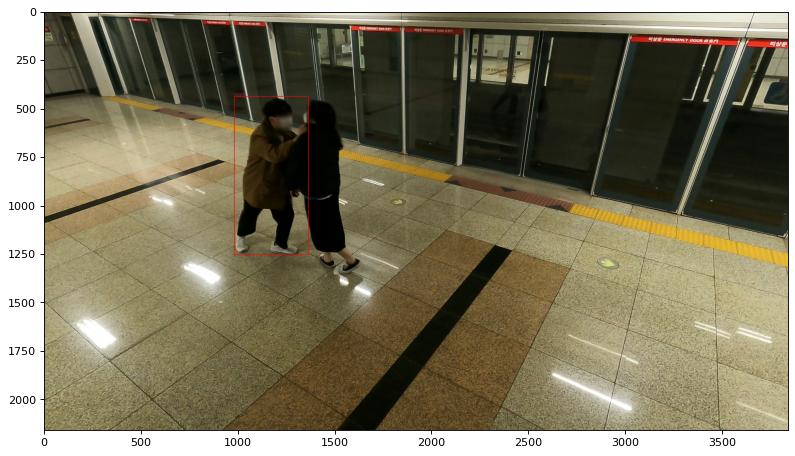

In [12]:
img = cv2.imread(path + image_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV는 기본적으로 BGR 형식을 따르므로, RGB 형식으로 변경
print(img.shape[0], img.shape[1])
label_name = 'frame_3936.txt'

colors=[(255,0,0),(255,50,0),(255,255,0),(0,255,0),(0,0,255),(0,5,255),(100,0,255),(0,255,255),(255,0,255),(176,192,222)]

# 특정한 레이블 파일을 읽어 확인
with open(train_path + 'labels/' + label_name) as f:
    # 각 객체(object)의 바운딩 박스 정보를 하나씩 확인하며
    for instance in f.readlines():
        image_width, image_height = img.shape[1], img.shape[0]

        label, x, y, width, height = map(float, instance.strip().split())
        print(f'클래스: {int(label)}, 중심 좌표: ({x:.5f}, {y:.5f}), 너비: {width:.5f}, 높이: {height:.5f}')

        c = (255,0,0)#colors[int(label)]
        # if int(label) == 0:
        #     c = (0, 255, 0) # mask인 경우 초록색
        # elif int(label) == 1:
        #     c = (255, 0, 0) # no-mask인 경우 빨간색

        # 왼쪽 위 좌표와 오른쪽 아래 좌표
        x1, y1 = image_width * (x - width / 2), image_height * (y - height / 2)
        x2, y2 = image_width * (x + width / 2), image_height * (y + height / 2)
        print(x1,y1,x2,y2)
        # 사각형 그리기
        cv2.rectangle(
            img,
            (int(x1), int(y1)), # 왼쪽 위 좌표
            (int(x2), int(y2)), # 오른쪽 아래 좌표
            color=c, # 색상
            thickness=2, # 굵기
        )
        img = img.copy()
        print(type(img))

        # 텍스트 그리기
        cv2.putText(
            img,
            str(class_names[int(label)]), # 텍스트 내용
            (int(x1), int(y1) - 5), # 위치
            fontFace=cv2.FONT_HERSHEY_PLAIN, # 글씨체
            fontScale=1.0, # 글씨 크기
            color=c, # 색상
            thickness=1, # 굵기
        )

plt.imshow(img)
plt.show()

In [13]:
import torch
torch.cuda.is_available()

True

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11m.pt')

model.train(
    data='./data.yaml',
    epochs=1000,
    imgsz=420,
    batch=24,
    name='TEST_yolo11m_640_24_2',
    device='cuda',  
    verbose=True
)

results = model.val()
print(results)


New https://pypi.org/project/ultralytics/8.3.186 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.182  Python-3.10.18 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=24, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1000, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=420, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=TEST_yolo11m_640_24_2, nbs=64, nms=False, opset=None, op

train: Scanning C:\Users\Home\Desktop\kcf23\subway\train\labels.cache... 4394 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4394/4394 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 223.896.6 MB/s, size: 1691.6 KB)


val: Scanning C:\Users\Home\Desktop\kcf23\subway\valid\labels.cache... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<?, ?it/s]


Plotting labels to runs\detect\TEST_yolo11m_640_24_2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005625000000000001), 112 bias(decay=0.0)
Image sizes 448 train, 448 val
Using 8 dataloader workers
Logging results to runs\detect\TEST_yolo11m_640_24_2
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      5.97G     0.8022      1.212     0.9261          8        448: 100%|██████████| 184/184 [01:22<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        345        920      0.696      0.795       0.81      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      6.05G     0.8314     0.7212     0.9158          7        448: 100%|██████████| 184/184 [00:56<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

                   all        345        920      0.835      0.864      0.903      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      6.12G     0.9789     0.7977     0.9656          8        448: 100%|██████████| 184/184 [00:56<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]


                   all        345        920      0.689      0.692      0.753      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      6.15G      1.019     0.7792     0.9886          8        448: 100%|██████████| 184/184 [00:51<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        345        920      0.708      0.655      0.735      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      6.09G      1.001     0.7267       0.99          5        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        345        920      0.789      0.793      0.859      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      6.17G     0.9567     0.6865     0.9715          4        448: 100%|██████████| 184/184 [00:51<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        345        920      0.676      0.768      0.752      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      6.15G     0.9128     0.6467     0.9623          1        448: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        345        920      0.816      0.867        0.9      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      6.09G     0.9016      0.615     0.9589          9        448: 100%|██████████| 184/184 [00:53<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        345        920      0.703      0.754      0.766      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      6.18G     0.8685     0.6008     0.9418          9        448: 100%|██████████| 184/184 [00:51<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        345        920      0.851      0.858      0.901      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      6.15G     0.8518     0.5746     0.9402          3        448: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.16it/s]

                   all        345        920      0.853      0.821      0.911      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      6.09G     0.8392      0.567     0.9376          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        345        920      0.749      0.769      0.803      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      6.17G     0.8155     0.5386      0.931          2        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]

                   all        345        920      0.855      0.842      0.903      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      6.16G     0.8087     0.5392     0.9285          6        448: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        345        920      0.752      0.767      0.815      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000       6.1G     0.7917     0.5212     0.9225          6        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]

                   all        345        920      0.771      0.786      0.813      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      6.18G     0.7844     0.5172     0.9184          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        345        920      0.799      0.816      0.886      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      6.15G     0.7718     0.5053     0.9185          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        345        920      0.747      0.845      0.845      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000       6.1G     0.7512     0.4927     0.9121         11        448: 100%|██████████| 184/184 [00:50<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        345        920      0.867      0.889      0.919      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      6.17G     0.7428     0.4853      0.907         10        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        345        920      0.861      0.841      0.886      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      6.16G     0.7354     0.4812     0.9056          6        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.03it/s]

                   all        345        920      0.859      0.861      0.901      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      6.09G     0.7381      0.476      0.908          5        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        345        920      0.814      0.807      0.852       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      6.18G     0.7234     0.4722     0.8991          7        448: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        345        920      0.845      0.839       0.88      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      6.15G     0.7164     0.4589     0.8956          7        448: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        345        920      0.852      0.855      0.905      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      6.09G     0.7071      0.463     0.8979          5        448: 100%|██████████| 184/184 [00:50<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        345        920      0.811      0.767      0.807       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      6.17G     0.7005     0.4525     0.8932         11        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]

                   all        345        920      0.897      0.903      0.945      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      6.16G      0.689      0.449     0.8902         12        448: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        345        920      0.827      0.877      0.923      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      6.09G     0.6846     0.4354     0.8857          0        448: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        345        920      0.766      0.807      0.823      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      6.18G     0.6761     0.4366     0.8863          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        345        920      0.796      0.857      0.888      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      6.15G     0.6793     0.4335     0.8893          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all        345        920      0.674      0.768      0.767      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      6.09G     0.6741      0.433     0.8881         15        448: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        345        920      0.753      0.748       0.83      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      6.17G     0.6692     0.4282     0.8845          9        448: 100%|██████████| 184/184 [00:51<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        345        920      0.762      0.723      0.784      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      6.18G     0.6709     0.4292     0.8883          6        448: 100%|██████████| 184/184 [00:55<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        345        920       0.86      0.865      0.919      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      6.08G     0.6654     0.4258     0.8853         13        448: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        345        920      0.819      0.816      0.855      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      6.16G     0.6573     0.4262      0.886         10        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        345        920      0.787      0.861      0.879      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      6.16G     0.6503     0.4122     0.8816          6        448: 100%|██████████| 184/184 [00:51<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.94it/s]

                   all        345        920      0.834      0.769      0.818      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      6.09G     0.6468     0.4135     0.8821          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        345        920      0.847      0.887      0.936      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      6.17G     0.6484      0.415     0.8796          5        448: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        345        920      0.841      0.887      0.892      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      6.16G     0.6521     0.4132     0.8813         10        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        345        920      0.918      0.938      0.961      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      6.09G     0.6357     0.4001      0.878          4        448: 100%|██████████| 184/184 [00:52<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]

                   all        345        920      0.847      0.814      0.866      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      6.17G     0.6223     0.3977     0.8716          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        345        920      0.752        0.8      0.817      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      6.15G     0.6304        0.4     0.8769          3        448: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        345        920      0.762      0.766       0.82      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      6.09G     0.6199     0.3961     0.8718         12        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        345        920        0.7      0.817      0.786      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      6.17G     0.6275     0.3937     0.8753          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        345        920      0.746      0.744       0.79       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      6.15G       0.61     0.3916      0.874          3        448: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        345        920       0.79      0.832      0.858      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      6.09G     0.6233     0.3921     0.8709          9        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        345        920      0.873      0.873      0.924      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      6.17G     0.6128     0.3866     0.8694         15        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        345        920      0.835       0.84      0.913      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      6.15G     0.6107     0.3814     0.8713          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        345        920      0.784      0.856       0.88      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      6.09G     0.6091     0.3835     0.8664          4        448: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        345        920      0.791       0.83      0.833      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      6.17G      0.605      0.382     0.8678          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        345        920        0.8      0.838      0.868      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      6.16G     0.5995     0.3828     0.8657          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        345        920       0.85      0.864      0.907      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      6.09G     0.5984     0.3809     0.8642          7        448: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        345        920       0.84      0.858      0.892       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      6.18G     0.5911     0.3783     0.8632          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]

                   all        345        920      0.742      0.739      0.764      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      6.16G     0.5923     0.3753     0.8655         17        448: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]

                   all        345        920       0.75      0.821       0.84      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000       6.1G     0.5873     0.3703     0.8649          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]

                   all        345        920      0.786      0.789      0.827      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      6.17G     0.5868     0.3739     0.8615          9        448: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        345        920      0.864      0.899      0.922      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      6.18G     0.5893      0.373     0.8613          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        345        920       0.83      0.894      0.905      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      6.09G      0.592      0.371     0.8631          9        448: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        345        920      0.804      0.848      0.843      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      6.17G     0.5851     0.3713     0.8624          9        448: 100%|██████████| 184/184 [00:52<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        345        920      0.788       0.83      0.855      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      6.16G     0.5775     0.3666     0.8583          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        345        920      0.814      0.843      0.869      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      6.09G     0.5765     0.3656     0.8624          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        345        920      0.785      0.844      0.839      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      6.17G     0.5764     0.3596     0.8621         11        448: 100%|██████████| 184/184 [00:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.90it/s]

                   all        345        920      0.874      0.849      0.908      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      6.16G      0.569     0.3571     0.8589          5        448: 100%|██████████| 184/184 [00:50<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        345        920      0.792       0.82      0.844      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      6.09G     0.5734     0.3613     0.8585          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]

                   all        345        920      0.836      0.809      0.849      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      6.17G     0.5716     0.3625     0.8594          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        345        920      0.833       0.87      0.896      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      6.15G     0.5641     0.3549     0.8573          4        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        345        920      0.792      0.834      0.851      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      6.09G     0.5613     0.3514      0.855          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]

                   all        345        920      0.798      0.833       0.85      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      6.17G     0.5654     0.3593     0.8574          3        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]

                   all        345        920      0.866       0.86      0.894      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      6.15G     0.5618     0.3502      0.856          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all        345        920      0.801      0.817      0.829      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      6.08G     0.5632     0.3565     0.8559          5        448: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        345        920      0.869      0.847      0.896      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      6.16G     0.5691     0.3584     0.8586          9        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        345        920       0.89      0.853      0.906      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      6.15G     0.5612     0.3496     0.8539          2        448: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        345        920      0.855      0.843      0.896      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      6.09G     0.5613     0.3525     0.8552          9        448: 100%|██████████| 184/184 [00:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        345        920      0.822      0.811       0.85      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      6.17G      0.554     0.3458      0.854         10        448: 100%|██████████| 184/184 [00:53<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all        345        920      0.827      0.798      0.851      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      6.15G     0.5561     0.3495     0.8552         12        448: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

                   all        345        920      0.789      0.806      0.842      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      6.09G     0.5554     0.3479     0.8546          6        448: 100%|██████████| 184/184 [00:51<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        345        920      0.746      0.782      0.801      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      6.17G     0.5479      0.344     0.8517          1        448: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        345        920      0.816      0.796      0.836      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      6.16G     0.5445     0.3425     0.8525          3        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        345        920      0.766      0.791      0.813      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      6.09G     0.5483     0.3437     0.8534          9        448: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all        345        920      0.922      0.885      0.936        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      6.17G     0.5515     0.3479     0.8537          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        345        920       0.81      0.824       0.88      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      6.18G     0.5426     0.3402     0.8465          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]

                   all        345        920      0.856       0.88      0.922      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      6.09G     0.5469      0.342      0.851          5        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]


                   all        345        920      0.894      0.888      0.908      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      6.17G      0.543     0.3423     0.8549         11        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        345        920      0.849      0.849      0.878      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      6.16G      0.543     0.3405     0.8511          7        448: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        345        920      0.885      0.856      0.912       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      6.09G     0.5389      0.337     0.8534         10        448: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        345        920      0.886      0.847      0.916       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      6.18G     0.5352      0.336     0.8459          9        448: 100%|██████████| 184/184 [00:52<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        345        920       0.84       0.86      0.891       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      6.16G     0.5397     0.3381     0.8507         10        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        345        920       0.84      0.817      0.858       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      6.08G     0.5345     0.3352     0.8499         10        448: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        345        920      0.848      0.829      0.889      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      6.18G     0.5324     0.3348     0.8471          9        448: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        345        920      0.856      0.836      0.881      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      6.16G     0.5353     0.3338     0.8499          7        448: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        345        920      0.843      0.834      0.851      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      6.08G     0.5294     0.3301     0.8473          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        345        920      0.819      0.856      0.874      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      6.16G     0.5301     0.3334     0.8479         10        448: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        345        920      0.868      0.853      0.908       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      6.17G     0.5279     0.3308     0.8492          7        448: 100%|██████████| 184/184 [00:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        345        920      0.859       0.83      0.859      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      6.08G     0.5325     0.3324     0.8522          3        448: 100%|██████████| 184/184 [00:49<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        345        920      0.815      0.863      0.891      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      6.17G     0.5276     0.3269     0.8478         10        448: 100%|██████████| 184/184 [00:49<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        345        920      0.864      0.849      0.912       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      6.16G     0.5259     0.3301     0.8439          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all        345        920      0.862      0.825      0.881      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      6.08G      0.519     0.3258     0.8473          7        448: 100%|██████████| 184/184 [00:53<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]

                   all        345        920      0.928      0.898      0.939      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      6.17G     0.5279       0.33     0.8509          2        448: 100%|██████████| 184/184 [00:50<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        345        920      0.887      0.862       0.89      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      6.16G     0.5192     0.3254     0.8444          8        448: 100%|██████████| 184/184 [00:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        345        920      0.898      0.894      0.928        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      6.09G     0.5242     0.3259     0.8444         11        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        345        920      0.871      0.881      0.922      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      6.17G     0.5159     0.3261     0.8434          7        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        345        920      0.848      0.888      0.907       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      6.16G     0.5183      0.323     0.8432          3        448: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        345        920      0.868       0.88      0.929      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      6.08G     0.5245     0.3267     0.8471          4        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        345        920      0.836      0.814      0.878      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      6.17G     0.5173     0.3283     0.8459          9        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        345        920      0.864      0.842      0.881      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      6.15G     0.5174     0.3259     0.8433          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.20it/s]

                   all        345        920      0.852      0.853      0.887      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      6.09G     0.5159     0.3233     0.8428          9        448: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        345        920      0.879      0.884      0.904      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      6.17G     0.5218     0.3256     0.8482          8        448: 100%|██████████| 184/184 [00:52<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        345        920      0.849      0.816      0.859      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      6.16G     0.5176     0.3254     0.8466         13        448: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        345        920      0.872      0.846      0.891      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      6.09G     0.5107     0.3193     0.8425          3        448: 100%|██████████| 184/184 [00:54<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        345        920      0.823      0.795       0.82      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      6.17G     0.5109     0.3187     0.8448          1        448: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        345        920      0.898      0.865      0.926      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      6.16G     0.5149     0.3223      0.845          8        448: 100%|██████████| 184/184 [00:52<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.07it/s]

                   all        345        920      0.851       0.83      0.887      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      6.09G     0.5121      0.321     0.8401          2        448: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        345        920      0.828      0.878      0.884      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      6.17G     0.5083     0.3209     0.8455          4        448: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        345        920      0.775      0.874      0.862      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      6.16G     0.5121     0.3203     0.8434          8        448: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        345        920      0.737      0.874       0.83      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      6.08G     0.5113     0.3161     0.8435          9        448: 100%|██████████| 184/184 [00:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]

                   all        345        920      0.826      0.805      0.862      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      6.17G     0.5149     0.3214     0.8452          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        345        920      0.864      0.844      0.896      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      6.15G     0.5047     0.3146     0.8417          4        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        345        920      0.844      0.848      0.892       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      6.09G      0.505      0.316     0.8442          7        448: 100%|██████████| 184/184 [00:49<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        345        920      0.854      0.786      0.858      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      6.17G     0.5053     0.3146     0.8432          4        448: 100%|██████████| 184/184 [00:51<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        345        920      0.813      0.813      0.845      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      6.15G     0.5012     0.3161     0.8417          6        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        345        920      0.806      0.801      0.815      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      6.09G     0.5012     0.3141     0.8405         10        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        345        920      0.815      0.804      0.823       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      6.17G     0.5063     0.3138     0.8394          5        448: 100%|██████████| 184/184 [00:53<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        345        920      0.834      0.788      0.839      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      6.16G     0.4994     0.3132      0.842          2        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        345        920      0.871      0.835       0.88      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      6.09G     0.5061     0.3137     0.8445          4        448: 100%|██████████| 184/184 [00:49<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]

                   all        345        920      0.848      0.844      0.883      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      6.17G     0.4993     0.3127     0.8405         13        448: 100%|██████████| 184/184 [00:49<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        345        920      0.828      0.889       0.91      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      6.16G     0.4981     0.3116     0.8405          9        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        345        920      0.848      0.839      0.896      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      6.09G     0.4949     0.3082     0.8406          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        345        920      0.842      0.818       0.85      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      6.17G     0.4987     0.3112     0.8402          4        448: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all        345        920      0.862      0.809      0.873      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      6.16G     0.4932     0.3087     0.8388          9        448: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        345        920      0.845      0.806      0.861      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      6.08G     0.5024     0.3102     0.8428          6        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        345        920      0.829       0.84      0.881      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      6.17G     0.4951     0.3074     0.8418          9        448: 100%|██████████| 184/184 [00:49<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        345        920      0.823      0.859      0.867      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      6.15G     0.5019     0.3141     0.8445          6        448: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all        345        920      0.826      0.842      0.846      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      6.09G      0.493     0.3094     0.8397          7        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        345        920      0.821      0.835      0.838      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      6.17G      0.496     0.3079      0.841          7        448: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        345        920      0.815      0.771      0.796      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      6.15G      0.498     0.3114     0.8446          2        448: 100%|██████████| 184/184 [00:48<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        345        920      0.818      0.765      0.796      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      6.09G     0.4927     0.3068     0.8389         11        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        345        920      0.766      0.834       0.82      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      6.17G      0.493     0.3048     0.8423          9        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        345        920      0.802      0.802      0.812      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      6.16G     0.4912     0.3075     0.8382          7        448: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        345        920      0.778      0.781       0.79      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      6.09G     0.4949     0.3055     0.8409          3        448: 100%|██████████| 184/184 [00:48<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        345        920      0.762      0.811      0.801       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      6.17G     0.4906     0.3051     0.8407          5        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        345        920       0.81      0.799      0.812      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      6.16G     0.4952      0.309     0.8421          5        448: 100%|██████████| 184/184 [00:48<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        345        920      0.852      0.816      0.833      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      6.09G     0.4894       0.31     0.8383          2        448: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        345        920      0.831      0.821      0.835      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      6.17G     0.4931     0.3066     0.8405          9        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        345        920      0.829      0.821      0.843      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      6.15G     0.4876     0.3033     0.8367          2        448: 100%|██████████| 184/184 [00:49<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        345        920      0.847      0.843      0.863      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      6.09G     0.4859     0.3021     0.8354          4        448: 100%|██████████| 184/184 [00:51<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]

                   all        345        920      0.862      0.834      0.871      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      6.16G      0.488     0.3027     0.8373          5        448: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        345        920      0.835      0.855      0.867      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      6.15G     0.4829     0.3027     0.8391          3        448: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        345        920      0.858      0.826      0.846       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      6.09G     0.4812     0.3001     0.8344          8        448: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        345        920      0.878      0.841      0.877      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      6.16G     0.4864     0.3016     0.8378          5        448: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        345        920      0.872      0.859      0.891      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      6.16G     0.4874     0.3033     0.8388         13        448: 100%|██████████| 184/184 [00:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        345        920      0.834      0.848      0.873      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      6.09G     0.4838     0.2989     0.8361          4        448: 100%|██████████| 184/184 [00:50<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all        345        920      0.814      0.863      0.862      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      6.18G     0.4801     0.2994     0.8378          5        448: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        345        920      0.824      0.855      0.858      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      6.16G     0.4829      0.302      0.837          8        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        345        920      0.855      0.825      0.852      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      6.09G     0.4837      0.301     0.8381          8        448: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        345        920      0.857      0.829      0.852      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      6.17G     0.4845      0.304     0.8366          2        448: 100%|██████████| 184/184 [00:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        345        920       0.88      0.832      0.866      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      6.15G     0.4777     0.2962     0.8383          4        448: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        345        920      0.877      0.844      0.868      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      6.09G     0.4734     0.2967     0.8351          4        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        345        920      0.888      0.838      0.871      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      6.17G     0.4803     0.2952     0.8395          4        448: 100%|██████████| 184/184 [00:49<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all        345        920      0.872      0.833      0.861      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      6.16G      0.481     0.2984     0.8349         10        448: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all        345        920      0.865      0.817      0.857      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      6.09G     0.4788     0.2977     0.8388          6        448: 100%|██████████| 184/184 [00:49<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        345        920      0.863       0.83      0.858      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      6.17G     0.4736     0.2959     0.8336          3        448: 100%|██████████| 184/184 [00:51<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        345        920      0.846      0.856      0.865      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      6.16G     0.4828     0.2994     0.8398          8        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        345        920      0.847      0.834      0.849      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      6.08G     0.4769     0.2958     0.8348          6        448: 100%|██████████| 184/184 [00:54<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        345        920      0.834      0.836      0.836      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      6.17G     0.4758     0.3002     0.8343          3        448: 100%|██████████| 184/184 [00:52<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        345        920      0.868       0.82       0.85      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      6.16G     0.4726     0.2952     0.8336          5        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        345        920      0.859      0.823      0.851      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      6.09G     0.4733     0.2954     0.8334          5        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        345        920      0.879      0.815      0.851      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      6.19G     0.4777     0.2979     0.8333          3        448: 100%|██████████| 184/184 [00:49<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        345        920      0.842      0.835      0.845      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      6.16G     0.4705     0.2909     0.8332          7        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        345        920      0.855      0.843      0.854      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      6.09G     0.4733     0.2954      0.834          8        448: 100%|██████████| 184/184 [00:51<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

                   all        345        920      0.871      0.846      0.856      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      6.17G       0.47     0.2906     0.8334          9        448: 100%|██████████| 184/184 [00:49<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        345        920      0.867      0.835      0.843      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      6.16G      0.471     0.2924     0.8341          7        448: 100%|██████████| 184/184 [00:49<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        345        920      0.863      0.858      0.869      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      6.09G     0.4711     0.2939     0.8369          5        448: 100%|██████████| 184/184 [00:52<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.99it/s]

                   all        345        920      0.836      0.865      0.863      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      6.17G     0.4739     0.2956     0.8343         16        448: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        345        920      0.851      0.858      0.868      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      6.16G     0.4724     0.2921     0.8324          9        448: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]

                   all        345        920      0.874      0.853      0.887      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000       6.1G     0.4704     0.2914     0.8338          6        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        345        920       0.86      0.868      0.891      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      6.17G     0.4733     0.2937     0.8383          7        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all        345        920      0.844      0.875      0.887      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      6.16G     0.4706     0.2935     0.8347          4        448: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        345        920      0.827      0.879      0.885      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      6.09G     0.4682     0.2889     0.8323          7        448: 100%|██████████| 184/184 [00:48<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        345        920      0.816      0.857       0.87      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      6.17G      0.465     0.2882     0.8316         10        448: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        345        920      0.812      0.864      0.869      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      6.16G     0.4673     0.2901     0.8348          5        448: 100%|██████████| 184/184 [00:51<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        345        920      0.811      0.866      0.863      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      6.08G     0.4717     0.2902     0.8334          4        448: 100%|██████████| 184/184 [00:50<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all        345        920      0.847      0.829      0.858      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000       6.2G     0.4693     0.2902     0.8348          6        448: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        345        920      0.828       0.83      0.845      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      6.15G     0.4656     0.2916     0.8329          8        448: 100%|██████████| 184/184 [00:52<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all        345        920       0.84      0.817      0.833      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      6.09G     0.4686     0.2909     0.8339         12        448: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        345        920      0.851      0.814       0.84      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      6.17G     0.4672     0.2908      0.831          4        448: 100%|██████████| 184/184 [00:48<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        345        920      0.821      0.824      0.834      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      6.15G     0.4623     0.2874     0.8313          8        448: 100%|██████████| 184/184 [00:50<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        345        920      0.831      0.824      0.839      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      6.08G     0.4656     0.2885      0.833         11        448: 100%|██████████| 184/184 [00:49<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        345        920      0.847      0.824      0.847      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      6.17G     0.4623     0.2872     0.8343          3        448: 100%|██████████| 184/184 [00:49<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        345        920      0.867      0.827      0.861      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      6.15G     0.4578     0.2846     0.8306          9        448: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        345        920      0.865      0.848      0.875      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      6.09G     0.4634     0.2868      0.833          7        448: 100%|██████████| 184/184 [00:49<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        345        920      0.874      0.848       0.88      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      6.17G     0.4648      0.287     0.8328          9        448: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        345        920      0.879      0.855      0.888      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      6.16G     0.4618     0.2864     0.8317          7        448: 100%|██████████| 184/184 [00:49<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        345        920      0.883       0.85      0.893       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      6.09G     0.4628     0.2871     0.8348         16        448: 100%|██████████| 184/184 [00:50<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all        345        920      0.887      0.848      0.894      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      6.17G     0.4545     0.2813     0.8284          5        448: 100%|██████████| 184/184 [00:49<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        345        920      0.892       0.85      0.894      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      6.17G     0.4619     0.2882     0.8319          3        448: 100%|██████████| 184/184 [00:49<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        345        920        0.9      0.846      0.895      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      6.09G     0.4578     0.2835     0.8317          5        448: 100%|██████████| 184/184 [00:49<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        345        920      0.905      0.852      0.902      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      6.17G     0.4603     0.2848     0.8333          4        448: 100%|██████████| 184/184 [00:49<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        345        920      0.907      0.853      0.908      0.793
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 95, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



195 epochs completed in 2.995 hours.
Optimizer stripped from runs\detect\TEST_yolo11m_640_24_2\weights\last.pt, 40.5MB
Optimizer stripped from runs\detect\TEST_yolo11m_640_24_2\weights\best.pt, 40.5MB

Validating runs\detect\TEST_yolo11m_640_24_2\weights\best.pt...
Ultralytics 8.3.182  Python-3.10.18 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
YOLO11m summary (fused): 125 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


                   all        345        920      0.928      0.898      0.939      0.811
               assault        343        344      0.938      0.883      0.956      0.824
                person        339        576      0.918      0.913      0.923      0.798
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs\detect\TEST_yolo11m_640_24_2
Ultralytics 8.3.182  Python-3.10.18 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 12281MiB)
YOLO11m summary (fused): 125 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2448.5150.8 MB/s, size: 1680.1 KB)


val: Scanning C:\Users\Home\Desktop\kcf23\subway\valid\labels.cache... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.65it/s]


                   all        345        920      0.925      0.898      0.939      0.813
               assault        343        344      0.937      0.884      0.956      0.826
                person        339        576      0.914      0.913      0.923        0.8
Speed: 0.4ms preprocess, 4.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\TEST_yolo11m_640_24_22
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([2, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001CDFB975BD0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.0180

In [5]:
from ultralytics import YOLO
model = YOLO("C:/Users/Home/Desktop/kcf23/runs/detect/TEST_yolo11m_640_24_2/weights/best.pt")

results = model(["C:/Users/Home/Desktop/kcf23/subway/train/images/frame_3782.jpg",
                 "C:/Users/Home/Desktop/kcf23/subway/train/images/frame_6432.jpg",
                 "C:/Users/Home/Desktop/kcf23/subway/train/images/frame_6308.jpg"])  # return a list of Results objects

# Process results list
for i,result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename=f"result4_{i}.jpg")  # save to disk


0: 256x448 1 assault, 33.5ms
1: 256x448 1 assault, 2 persons, 33.5ms
2: 256x448 2 assaults, 33.5ms
Speed: 1.4ms preprocess, 33.5ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 448)


In [15]:
# # !git clone https://github.com/ndb796/yolov5 # 저장소 클론(clone)하기
# # YOLO v5 폴더 안으로 들어가기
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5
# # 특정 시점의 코드 불러오기
# # !git reset --hard cd9aa38366f025de0db1eaaf825175f6bbb43c4f
# !pip install -qr requirements.txt # 종속성(dependencies) 설치(installation)

#### <b>문제 7. 학습된 모델 사용해 보기</b>

* YOLO v5 저장소에서는 <b>사전 학습된(pre-trained) 모델을 제공</b>합니다.
    * YOLO v5는 자동으로 사전 학습된 모델을 다운로드하여 프로그램을 동작시킵니다.
    * 만약 자동으로 다운로드가 안 된다면 <b>\[[참고 다운로드 경로](https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EShcyHsWYmpOq1duBeLhif8BTGJkXM8-YXG2B_dUsLFM_g?e=tekCTN)\]</b>에서 다운로드 가능합니다.
* COCO 데이터셋에 대하여 이미 학습된 모델을 이용해 봅시다.
* 객체 탐지를 수행할 이미지들이 존재하는 경로는 ./data/images입니다.

In [23]:
!python detect.py --weights C:/Users/Home/Desktop/kcf23/runs/detect/TEST_yolo11m_640_24_2/weights/best.pt --img 640 --conf 0.25 --source C:/Users/Home/Desktop/kcf23/test/



python: can't open file 'c:\\Users\\Home\\Desktop\\kcf23\\detect.py': [Errno 2] No such file or directory


In [17]:
#!python ./yolov5/train.py --img 420 --epochs 400 --batch 16 --data F:/kaist/1/kcf23_본선/data.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name Fight5

In [18]:
#!python ./yolov5/val.py --data F:/kaist/1/kcf23_본선/data.yaml --img 640 --weight ./yolov5/runs/train/Fight5/weights/best.pt

In [19]:
#!python val.py --task test --data ./data.yaml --img 416 --weight runs/train/fire_smoke/weights/best.pt

In [20]:
# !python ./yolov5/detect.py \
# --weight ./yolov5/runs/train/Fight5/weights/best.pt \
# --source F:/kaist/1/kcf23_본선/subway/valid/images/frame_3975.jpg \
# --img 420 \
# --conf 0.25

#### <b>문제 16. 학습 결과 확인하기</b>

* results.png를 확인하여 전체 학습 결과를 분석할 수 있습니다.

In [21]:
# from IPython.display import Image as Display # to display images

# # runs/train/pets_yolov5/results.png 화면에 출력하기
# Display(filename='runs/train/Fight/results.png', width=1080)

In [22]:
# !python yolov5/test.py --data F:/kaist/1/kcf23_본선/data.yaml --img 640 --weight runs/train/Fight/weights/best.pt